# Generating the Baseline Control Set

In this section, we generate the full **Baseline Control Set** used for the benchmarks and illustrations in the article.

We divide the generation into two visualization groups to avoid clutter:
1.  **Main Directions:** Primitives starting from cardinal ($0, \pi/2, \dots$) and diagonal ($\pi/4, 3\pi/4, \dots$) directions.
2.  **Intermediate Directions:** Primitives starting from the remaining angles (e.g., $\arctan(1/2)$).

In [8]:
import matplotlib.pyplot as plt
from create_prims_file import save_and_show
from trajectory_optimization import optimization_Newton 
import sys
sys.path.append("../common/")
from KC_structs import *
from KC_graphics import *
%matplotlib inline  
import numpy as np

In [9]:
theta_16 = Theta()
primitives_file = "base_control_set.txt"

### Part 1: Main Directions (Cardinal & Diagonal)
The plot below combines primitives for $\theta=0$ (index 0) and $\theta=\pi/4$ (index 2). Due to the symmetry handling in `save_and_show`, this effectively covers all 8 primary directions (0, 45, 90, 135, 180, 225, 270, 315 degrees).

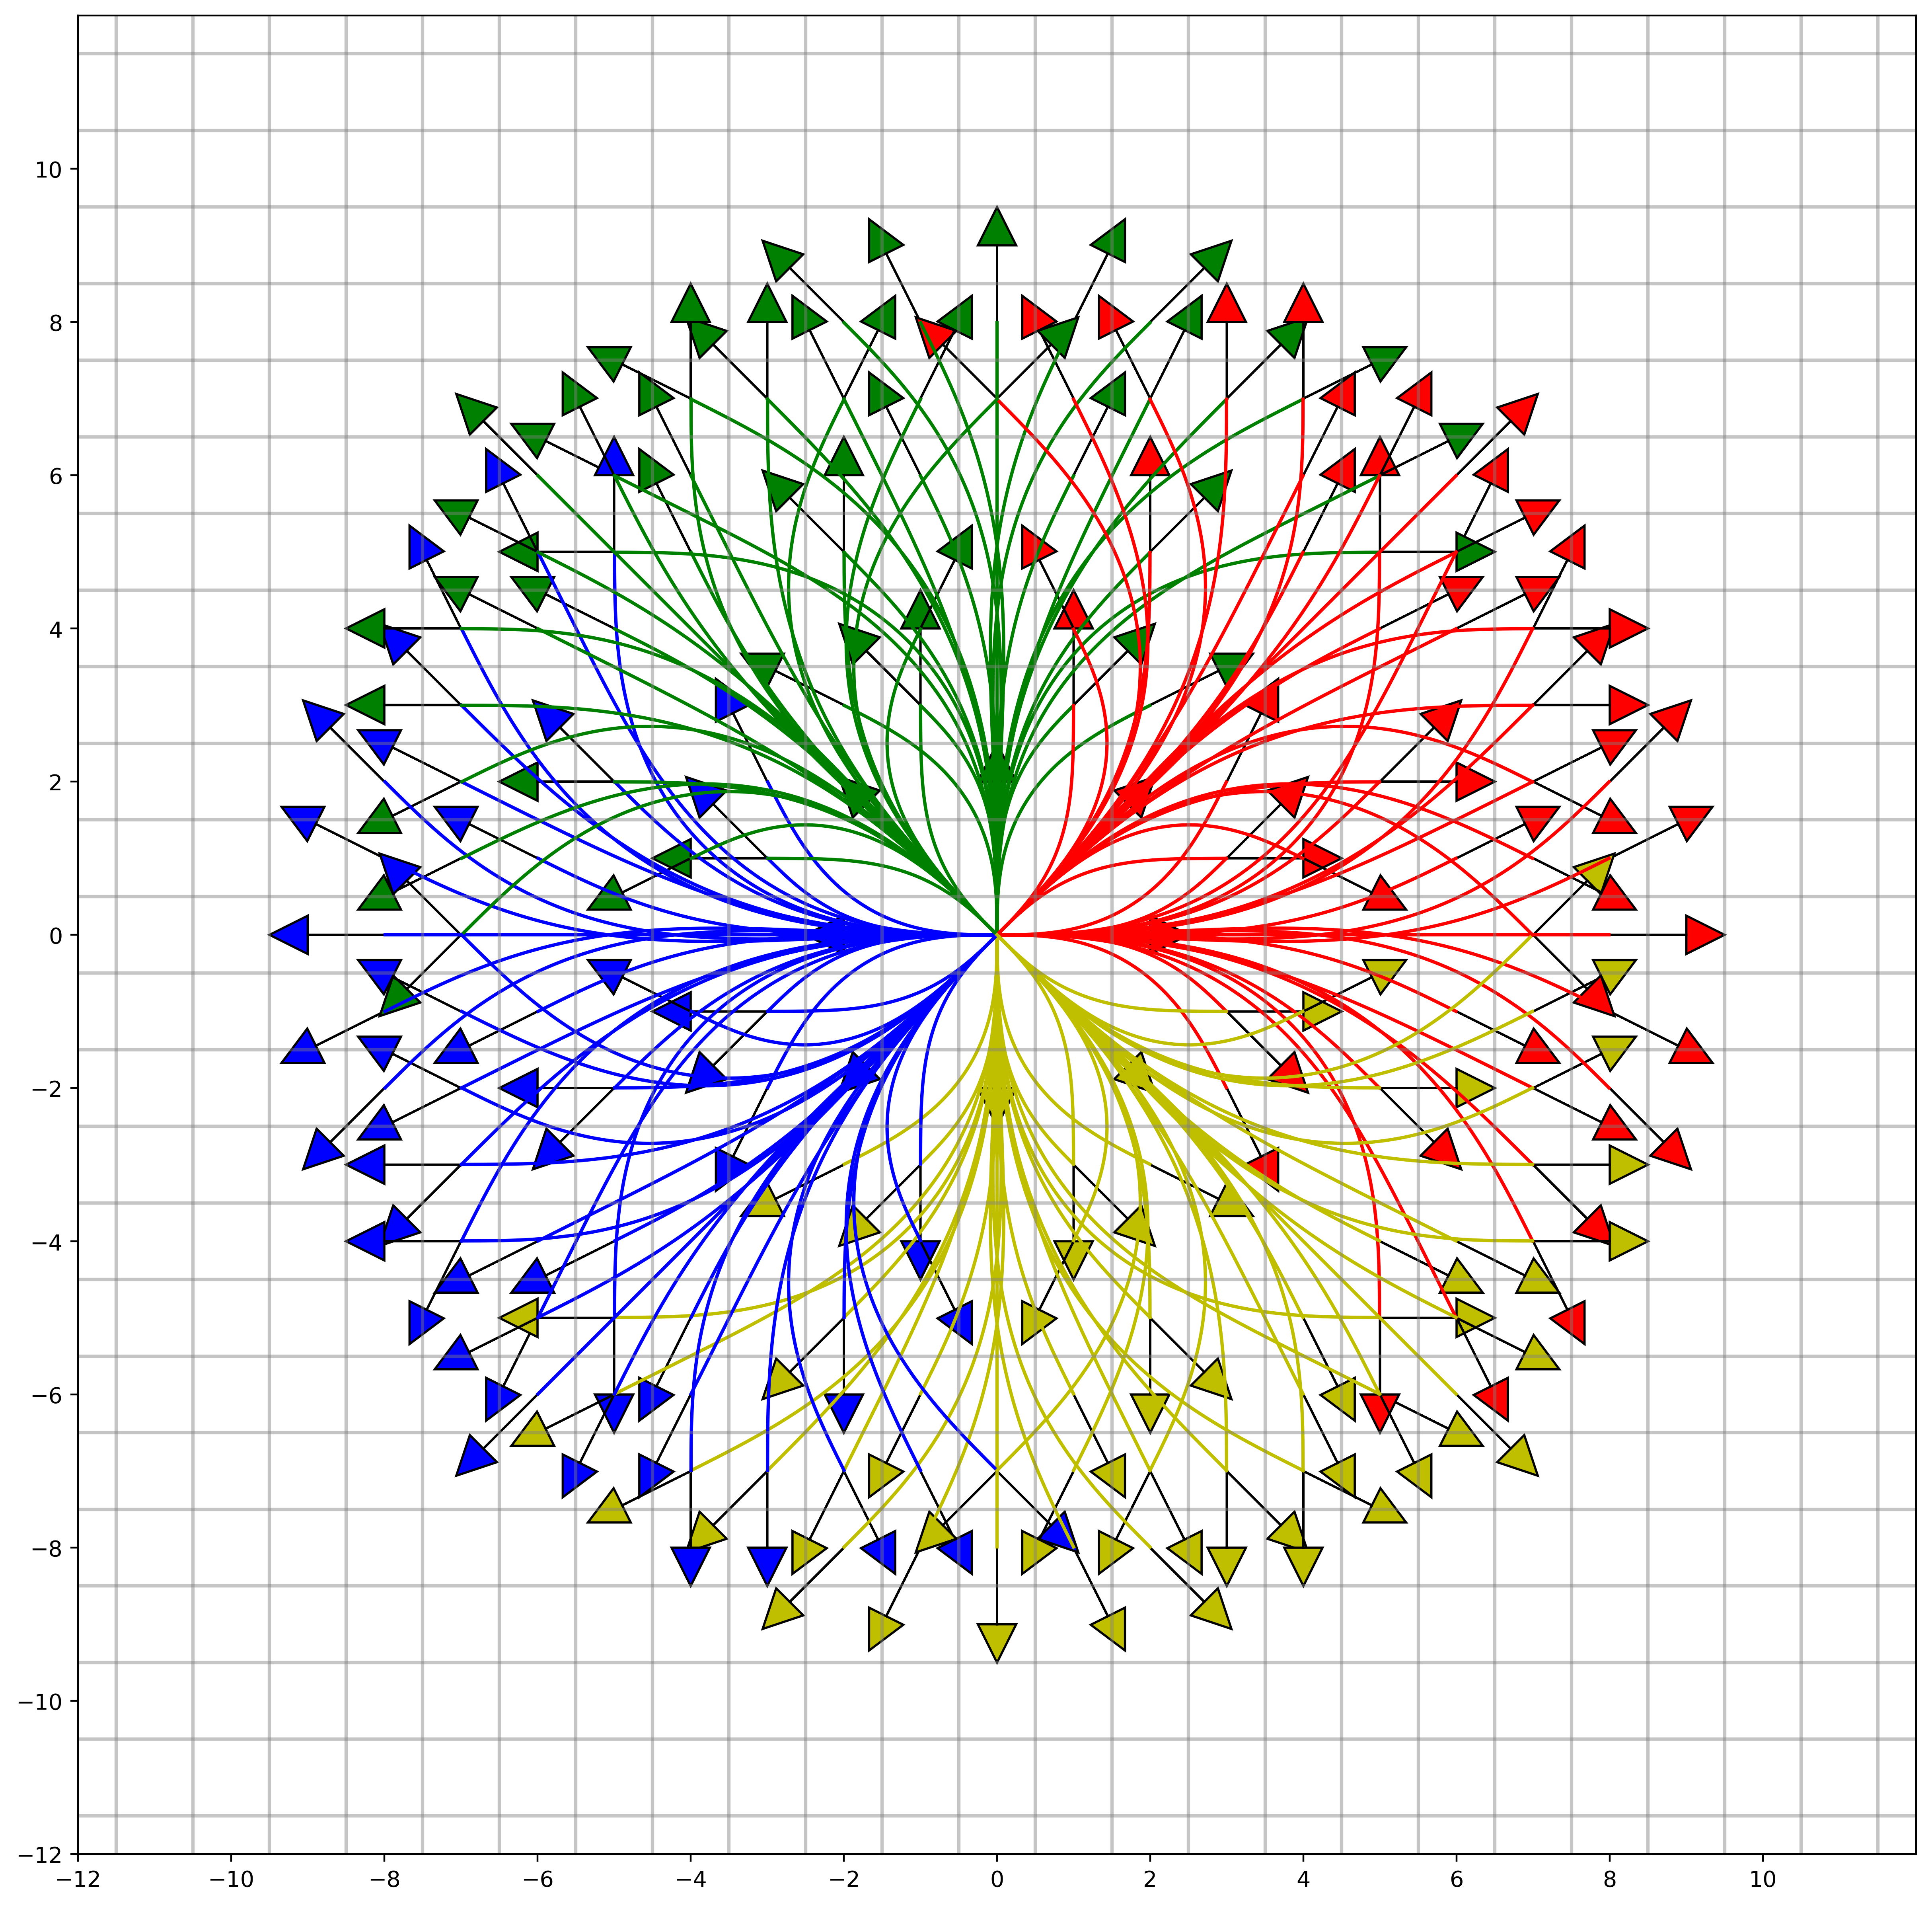

In [10]:
# Setup the figure for the combined plot
fig = plt.figure(figsize=(15, 15), dpi=400) 
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box') # Keep aspect ratio correct

# ==========================================
# Group A: Cardinal Directions (Start Theta = 0)
# ==========================================
start_cardinal = State(x=0, y=0, theta=theta_16[0])

# Targets for Cardinal directions
targets_cardinal = [
    State(x=8.0, y=0.0, theta=theta_16[0]),  
    State(x=1.0, y=0.0, theta=theta_16[0]),
    
    State(x=5.0, y=5.0, theta=theta_16[4]),
    State(x=8.0, y=1.0, theta=theta_16[1]),
    State(x=8.0, y=2.0, theta=theta_16[2]),
    State(x=6.0, y=5.0, theta=theta_16[3]),
    State(x=7.0, y=4.0, theta=theta_16[3]),
    State(x=6.0, y=1.0, theta=theta_16[1]),
    State(x=7.0, y=3.0, theta=theta_16[2]),

    State(x=5.0, y=-5.0, theta=theta_16[-4]),
    State(x=8.0, y=-1.0, theta=theta_16[-1]),
    State(x=8.0, y=-2.0, theta=theta_16[-2]),
    State(x=6.0, y=-5.0, theta=theta_16[-3]),
    State(x=7.0, y=-4.0, theta=theta_16[-3]),
    State(x=6.0, y=-1.0, theta=theta_16[-1]),
    State(x=7.0, y=-3.0, theta=theta_16[-2]),
    
    State(x=3.0, y=1.0, theta=theta_16[2]),
    State(x=3.0, y=2.0, theta=theta_16[3]),
    State(x=3.0, y=-1.0, theta=theta_16[-2]),
    State(x=3.0, y=-2.0, theta=theta_16[-3]),
    State(x=7.0, y=2.0, theta=theta_16[1]),
    State(x=7.0, y=-2.0, theta=theta_16[-1]),
    State(x=5.0, y=2.0, theta=theta_16[2]),
    State(x=5.0, y=-2.0, theta=theta_16[-2]),
]

for target in targets_cardinal:
    _, prim = optimization_Newton(start=start_cardinal, goal=target)
    save_and_show(file=primitives_file, prim=prim, ax=ax, theta_discrete=theta_16)


# ==========================================
# Group B: Diagonal Directions (Start Theta = pi/4)
# ==========================================
start_diagonal = State(x=0, y=0, theta=theta_16[2]) # Index 2 is 45 degrees

# Targets for Diagonal directions
targets_diagonal = [
    State(x=6.0, y=6.0, theta=theta_16[2]),
    State(x=1.0, y=1.0, theta=theta_16[2]),

    State(x=0.0, y=7.0, theta=theta_16[6]),
    State(x=5.0, y=6.0, theta=theta_16[3]),
    State(x=4.0, y=7.0, theta=theta_16[4]),
    State(x=1.0, y=7.0, theta=theta_16[5]),
    State(x=2.0, y=7.0, theta=theta_16[5]),
    State(x=4.0, y=5.0, theta=theta_16[3]),
    State(x=3.0, y=7.0, theta=theta_16[4]),

    State(x=7.0, y=0.0, theta=theta_16[-2]),
    State(x=6.0, y=5.0, theta=theta_16[1]),
    State(x=7.0, y=4.0, theta=theta_16[0]),
    State(x=7.0, y=1.0, theta=theta_16[-1]),
    State(x=7.0, y=2.0, theta=theta_16[-1]),
    State(x=5.0, y=4.0, theta=theta_16[1]),
    State(x=7.0, y=3.0, theta=theta_16[0]),

    State(x=1.0, y=3.0, theta=theta_16[4]),
    State(x=1.0, y=4.0, theta=theta_16[5]),
    State(x=3.0, y=1.0, theta=theta_16[0]),
    State(x=4.0, y=1.0, theta=theta_16[-1]),
    State(x=4.0, y=6.0, theta=theta_16[3]),
    State(x=6.0, y=4.0, theta=theta_16[1]),
    State(x=2.0, y=5.0, theta=theta_16[4]),
    State(x=5.0, y=2.0, theta=theta_16[0]),
]

for target in targets_diagonal:
    _, prim = optimization_Newton(start=start_diagonal, goal=target)
    save_and_show(file=primitives_file, prim=prim, ax=ax, theta_discrete=theta_16)

# Finalize plot
draw_grid(ax, xs=-12, ys=-12, xf=12, yf=12, tick_step=2)

# Save to images folder
# plt.savefig("../../images/base_control_set_part1.png", transparent=False, bbox_inches="tight", facecolor='white')
plt.show()

### Part 2: Intermediate Directions

Here we generate primitives for the remaining "intermediate" angles. Specifically, we start with **$\theta_1$** (which corresponds to a slope of 1:2, or $\arctan(0.5)$).

**Symmetry Strategy:**
Since the lattice is symmetric, we do not need to manually define targets for the mirrored angle **$\theta_7$** (the reflection of $\theta_1$ across the Y-axis). Instead, for every primitive generated for $\theta_1$:
1.  We save the original primitive.
2.  We mathematically reflect it across the Y-axis:
    * Start angle becomes $\theta_7$.
    * X-coordinates are negated ($x \to -x$).
    * Curvature is negated ($k \to -k$).
    * The relative change in heading is inverted.
3.  We save this reflected primitive.

This effectively doubles our dataset efficiency for these complex angles.

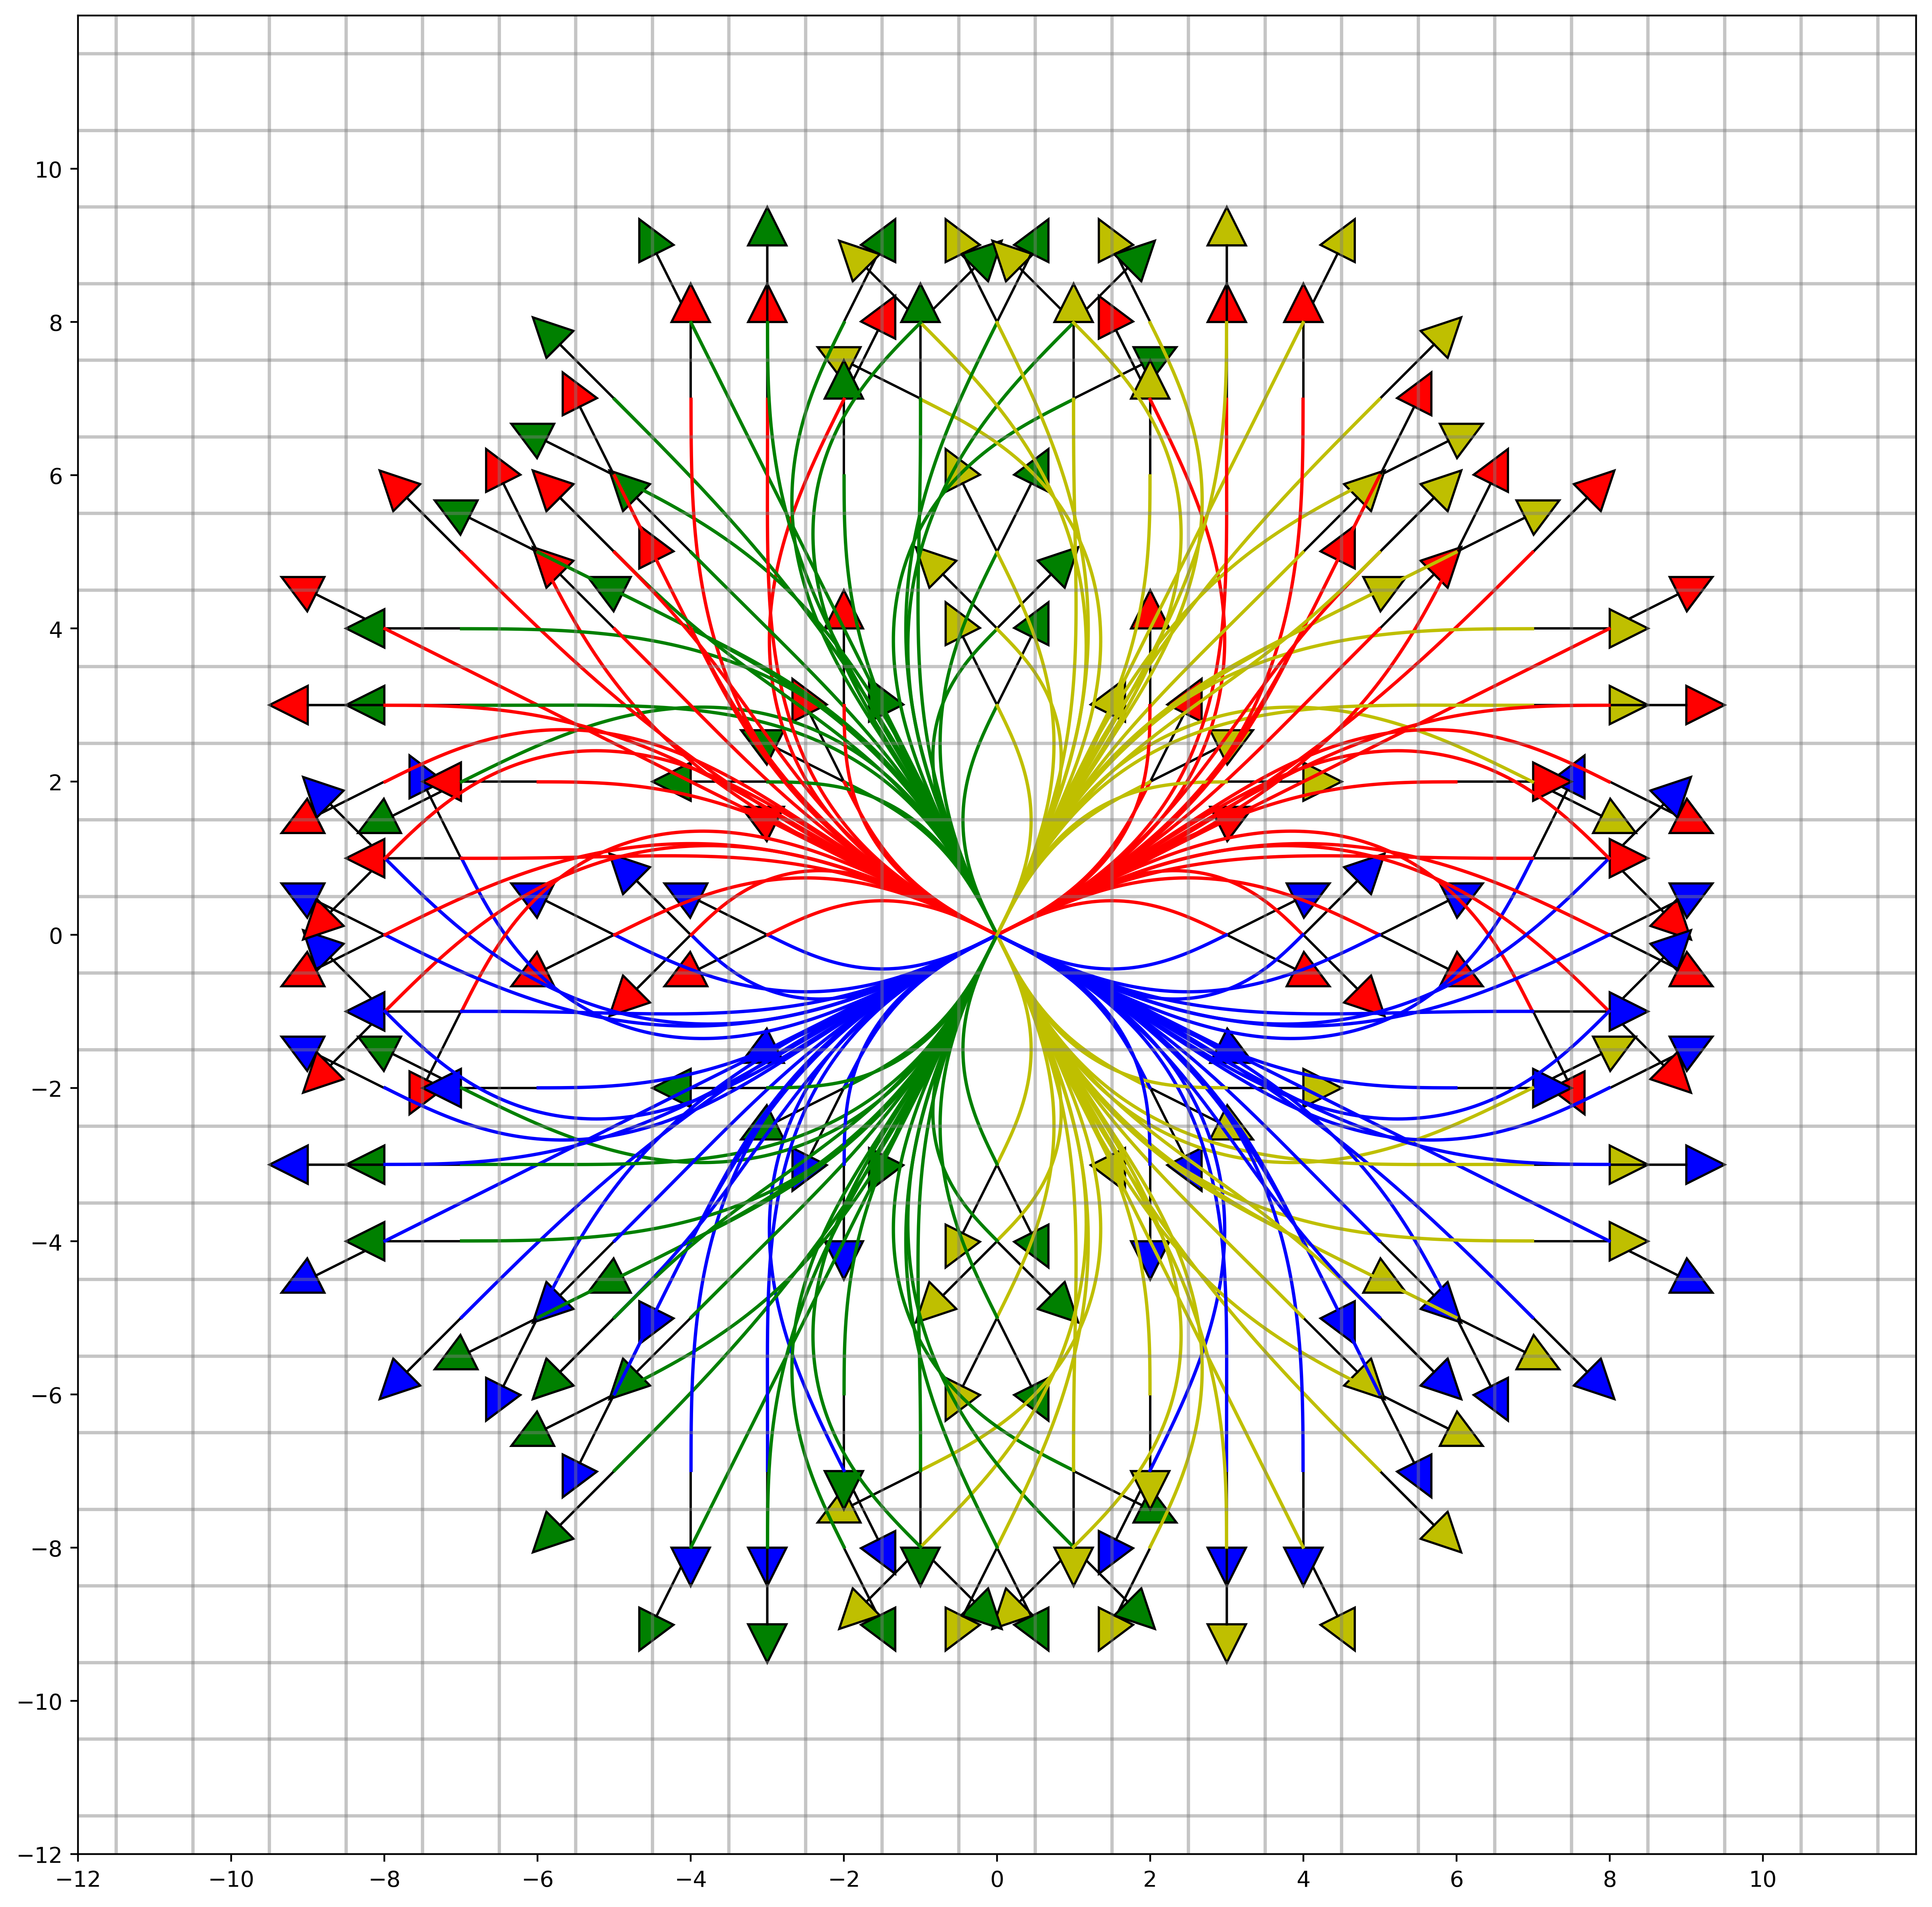

In [11]:
# Setup figure
fig = plt.figure(figsize=(15, 15), dpi=400)
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')

# Start with index 1 (e.g., arctan(0.5))
start = State(x=0, y=0, theta=theta_16[1])

# Targets for theta_1 (Right-side bias)
# Note: theta_16[0] is used instead of theta_16[16] to avoid index errors
targets_intermediate = [
    State(x=8.0, y=4.0, theta=theta_16[1]),
    State(x=2.0, y=1.0, theta=theta_16[1]),
    
    State(x=2.0, y=7.0, theta=theta_16[5]),
    State(x=7.0, y=5.0, theta=theta_16[2]),
    State(x=6.0, y=5.0, theta=theta_16[3]),
    State(x=3.0, y=7.0, theta=theta_16[4]),
    State(x=4.0, y=7.0, theta=theta_16[4]),
    State(x=5.0, y=4.0, theta=theta_16[2]),
    State(x=5.0, y=6.0, theta=theta_16[3]),
    
    State(x=7.0, y=-1.0, theta=theta_16[13]),
    State(x=8.0, y=3.0, theta=theta_16[0]),   # 16 -> 0
    State(x=8.0, y=2.0, theta=theta_16[15]),
    State(x=8.0, y=-1.0, theta=theta_16[14]),
    State(x=8.0, y=1.0, theta=theta_16[14]),
    State(x=6.0, y=2.0, theta=theta_16[0]),   # 16 -> 0
    State(x=8.0, y=0.0, theta=theta_16[15]),
    
    State(x=2.0, y=2.0, theta=theta_16[3]),
    State(x=2.0, y=3.0, theta=theta_16[4]),
    State(x=3.0, y=0.0, theta=theta_16[15]),
    State(x=4.0, y=-0.0, theta=theta_16[14]),
    State(x=5.0, y=5.0, theta=theta_16[2]),
    State(x=7.0, y=1.0, theta=theta_16[0]),   # 16 -> 0
    State(x=4.0, y=4.0, theta=theta_16[3]),
    State(x=5.0, y=0.0, theta=theta_16[15]),
]

for target in targets_intermediate:
    # 1. Generate and save the base primitive
    _, prim = optimization_Newton(start=start, goal=target)
    save_and_show(file=primitives_file, prim=prim, ax=ax, theta_discrete=theta_16)

    # 2. Generate and save the reflected primitive (Symmetry across Y-axis)
    # The reflection of index 1 is index 7
    
    # Mirror the start and goal states configuration
    prim.start = State(prim.start.x, prim.start.y, theta_16[7], -prim.k0)
    delta_theta = prim.goal.theta - theta_16[1]
    prim.goal = State(-prim.goal.x, prim.goal.y, theta_16[7] - delta_theta)
    
    # Mirror the polynomial coefficients (curvature flips sign)
    prim.set_coef_params(-prim.a, -prim.b, -prim.c, prim.length)
    
    save_and_show(file=primitives_file, prim=prim, ax=ax, theta_discrete=theta_16)

# Finalize plot
draw_grid(ax, xs=-12, ys=-12, xf=12, yf=12, tick_step=2)

# plt.savefig("../../images/base_control_set_part2.png", transparent=False, bbox_inches="tight", facecolor='white')
plt.show()